In [1]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import stats
from statistics import mode
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
from statistics import median
from statistics import mode

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data
### usually this block prints out "nd2reader module not found. Reading of .nd2 files disabled." on the first run
### this is fine (unless you need to read .nd2 files), just re-run this block to make the error go away

C:\Users\svc-scst291lab\Documents\GitHub\user-friendly-SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
C:\Users\svc-scst291lab\Documents\GitHub\user-friendly-SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
C:\Users\svc-scst291lab\Documents\GitHub\user-friendly-SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
def subtract_mean_and_shift(image):
    image = (image*1.0) - (np.mean(image))  
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

def filter_and_shift(image, filtersize):
    image = (image*1.0) - ((uf(image,filtersize))*1)  #(image) - unifrom-filtered(image) subtracts background
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

In [5]:
date = "04-03-23"
exp1 = "AE-3.31µM"
exp2 = "AE-6.62µM"
exp3 = "WT-3.31µM"
exp4 = "WT-6.62µM"
#concentration = "1x"

### "data_dir" is the pathway to the folder holding the tiff files to be analyzed --> change to your folder location
data_dir = "Z:\\Maya N\\data\\"+date+"\\all tiff files\\"
data_save = "Z:\\Maya N\\analysis\\"+date+"\\"
### "plot_saveto" is the pathway to the folder where plots and results will be saved
plot_saveto = data_save

files = glob.glob(data_dir+"*tif") ### this should generate an ordered list of files in "data_dir" which have "_t" in their name
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 24 files
 0 	 20x_t1_MMStack_Pos0.ome.tif
 1 	 20x_t2_MMStack_Pos0.ome.tif
 2 	 20x_t3_MMStack_Pos0.ome.tif
 3 	 20x_t4_MMStack_Pos0.ome.tif
 4 	 row1_t1_MMStack_Pos0.ome.tif
 5 	 row1_t2_MMStack_Pos0.ome.tif
 6 	 row1_t3_MMStack_Pos0.ome.tif
 7 	 row1_t4_MMStack_Pos0.ome.tif
 8 	 row2_t1_MMStack_Pos0.ome.tif
 9 	 row2_t2_MMStack_Pos0.ome.tif
 10 	 row2_t3_MMStack_Pos0.ome.tif
 11 	 row2_t4_MMStack_Pos0.ome.tif
 12 	 row3_t1_MMStack_Pos0.ome.tif
 13 	 row3_t2_MMStack_Pos0.ome.tif
 14 	 row3_t3_MMStack_Pos0.ome.tif
 15 	 row3_t4_MMStack_Pos0.ome.tif
 16 	 row4_t1_MMStack_Pos0.ome.tif
 17 	 row4_t2_MMStack_Pos0.ome.tif
 18 	 row4_t3_MMStack_Pos0.ome.tif
 19 	 row4_t4_MMStack_Pos0.ome.tif
 20 	 row5_t1_MMStack_Pos0.ome.tif
 21 	 row5_t2_MMStack_Pos0.ome.tif
 22 	 row5_t3_MMStack_Pos0.ome.tif
 23 	 row5_t4_MMStack_Pos0.ome.tif


In [ ]:
file_array = np.array(file[0,4,8])
print()

In [6]:
time_array = [1, 7, 15, 25]     #time corresponding with each tiff file
time_key = 0
time = time_array[time_key]
image_time = "time 3"

In [ ]:
def select_data(frame_key):
    if framekey
    
    


In [6]:
image_key = 0
number_of_images = 5

chosen_tiff1 = files[4]
chosen_image1 = tiff_file.imread(chosen_tiff1, key=[image_key]) #key=[ ] selects which frame of the tiff file will be read
chosen_tiff2 = files[8]
chosen_image2 = tiff_file.imread(chosen_tiff2, key=[image_key])
chosen_tiff3 = files[12]
chosen_image3 = tiff_file.imread(chosen_tiff2, key=[image_key])
chosen_tiff4 = files[16]
chosen_image4 = tiff_file.imread(chosen_tiff2, key=[image_key])
chosen_tiff5 = files[20]
chosen_image5 = tiff_file.imread(chosen_tiff2, key=[image_key])


all_pixel_values = []
for i in range(number_of_images):
    image_array_2D1 = tiff_file.imread(chosen_tiff1, key=[image_key])
    pixel_values_list1 = image_array_2D1.ravel()
    image_array_2D2 = tiff_file.imread(chosen_tiff1, key=[image_key])
    pixel_values_list2 = image_array_2D1.ravel()

    all_pixel_values.extend(pixel_values_list1 + pixel_values_list2 + pixel_values_list3 + pixel_values_list4 + pixel_values_list5)
#print('List 1 before extend():', chosen_image1)


#might say "list index out of range" - if so, just change first key from i→1, run then change back to i and rerun

TypeError: list indices must be integers or slices, not tuple

<IPython.core.display.Javascript object>


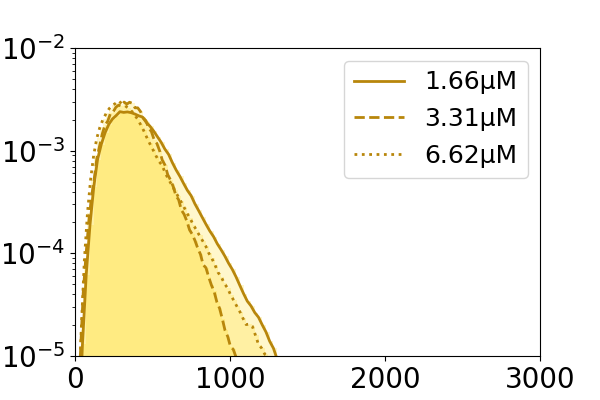

In [49]:
%matplotlib notebook

#AE = green, EA = blue, WT = magenta
c1 = "darkgoldenrod"      #AE: 1/4x = darkgolenrod, 1/2x = gold, 1x = khaki
c2 = "gold"     #EA: 1/4x = darkblue, 1/2x = blue, 1x = dodgerblue
c3 = "khaki"      #WT: 1/4x = darkmagenta, 1/2x = magenta, 1x = violet

bin_num = 100      # number of histogram bins, changing this effects the histogram (can be set to "auto")

fig, ax = plt.subplots(figsize=(6,4)) #set up 'figure 2' - mean subtraction
all_intensities_list1 = subtract_mean_and_shift(chosen_image1) #subtract_mean_and_shift
all_intensities_list2 = subtract_mean_and_shift(chosen_image2)
all_intensities_list3 = subtract_mean_and_shift(chosen_image3)

probabilities_subtract_mean, bins_subtract_mean = np.histogram(all_intensities_list1, bins=bin_num, density = True)
ax.plot(bins_subtract_mean[:-1], probabilities_subtract_mean, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, 
        label = exp1)
counts_subtract_mean, bins_subtract_mean, bars_subtract_mean = ax2.hist(all_intensities_list1, bins=bin_num, density = True, 
                                                                       color = c2, alpha = 0.2, histtype = "stepfilled")


probabilities_subtract_mean2, bins_subtract_mean2 = np.histogram(all_intensities_list2, bins=bin_num, density = True)
ax.plot(bins_subtract_mean2[:-1], probabilities_subtract_mean2, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, 
        label = exp2, linestyle='dashed')
counts_subtract_mean2, bins_subtract_mean2, bars_subtract_mean2 = ax.hist(all_intensities_list2, bins=bin_num, density = True, 
                                                                          color = c2, alpha = 0.2, histtype = "stepfilled")



probabilities_subtract_mean3, bins_subtract_mean3 = np.histogram(all_intensities_list3, bins=bin_num, density = True)
ax.plot(bins_subtract_mean3[:-1], probabilities_subtract_mean3, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, 
        label = exp3, linestyle='dotted')
counts_subtract_mean3, bins_subtract_mean3, bars_subtract_mean3 = ax.hist(all_intensities_list3, bins=bin_num, density = True, 
                                                                          color = c2, alpha = 0.2, histtype = "stepfilled")
ax.set_xlim(0,3000)
ax.set_ylim(10E-6, 10E-3)
ax.tick_params(axis='both', labelsize=20)
ax.set_yscale('log')
#ax.set_xlabel("Pixel Intensity")
#ax.set_ylabel("Probability")
ax.legend(loc = "upper right", fontsize=18)
#ax.set_title("Mean Subtracted Probability Distribution at " + str(time) + " hr", fontsize=12)
fig.savefig(plot_saveto + "mean subtracted histogram for AE " + image_time + ".jpg", dpi=800, bbox_inches = 'tight', transparent=True)  
plt.show()

In [ ]:
histogram_dict = {}     #makes dictionary

histogram_dict["AE"] = {}     #makes subdictionary for AE files
histogram_dict["AE"][probabilities] = probabilities
histogram_dict["AE"][probabilities] = probabilities_subtract_mean
histogram_dict["AE"][bins] = bins
histogram_dict["AE"][bins]= bins_subtract_mean

histogram_dict["EA"] = {}     #makes subdictionary for EA files
histogram_dict["EA"][probabilities] = probabilities2
histogram_dict["EA"][probabilities] = probabilities_subtract_mean2
histogram_dict["EA"][bins] = bins2
histogram_dict["EA"][bins]= bins_subtract_mean2

histogram_dict["WT"] = {}     #makes subdictionary for WT files
histogram_dict["WT"][probabilities] = probabilities3
histogram_dict["WT"][probabilities] = probabilities_subtract_mean3
histogram_dict["WT"][bins] = bins3
histogram_dict["WT"][bins]= bins_subtract_mean3

with open("1x WT bead" + date + ".pkl", 'wb') as f:     #saves intensity data
    pickle.dump(histogram_dict, f)

In [ ]:
fig, ax2 = plt.subplots(figsize=(6,4)) #set up 'figure 1' - raw intensity values
probabilities, bins = np.histogram(chosen_image1.ravel(), bins=bin_num, density = True)
ax2.plot(bins[:-1], probabilities, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, label = exp1)
counts, bins, bars = ax2.hist(chosen_image1.ravel(), bins=bin_num, density = True, color = c1, alpha = 0.2, 
                              histtype = "stepfilled")


probabilities2, bins2 = np.histogram(chosen_image2.ravel(), bins=bin_num, density = True)
ax2.plot(bins2[:-1], probabilities2, 'o-', linewidth=2, markersize=0, color = c2, alpha = 1, label = exp2, linestyle='dashed')
counts2, bins2, bars2 = ax2.hist(chosen_image2.ravel(), bins=bin_num, density = True, color = c2, alpha = 0.2, 
                              histtype = "stepfilled")



probabilities3, bins3 = np.histogram(chosen_image3.ravel(), bins=bin_num, density = True)
ax2.plot(bins3[:-1], probabilities3, 'o-', linewidth=2, markersize=0, color = c3, alpha = 1, label = exp3, linestyle='dotted')
counts3, bins3, bars3 = ax2.hist(chosen_image3.ravel(), bins=bin_num, density = True, color = c3, alpha = 0.2, 
                                histtype = "stepfilled")

                                                 #plots a histogram for a given list; 
                                                 #___.ravel() converts a 2D image array to a 1D list of pixel intensities
ax2.set_xlim(1000,3500)
ax2.set_ylim(10E-6, 10E-3)  
ax2.tick_params(axis='both', labelsize=20)
ax2.set_yscale('log')
#ax2.set_xlabel("Pixel Intensity")
#ax2.set_ylabel("Probability")
ax2.legend(loc = "upper right", fontsize=18)
#ax2.set_title("Probability Distribution at " + str(time) + " hr", fontsize=12)
fig.savefig(plot_saveto + "probability histogram for AE " + image_time + ".jpg", dpi=800, bbox_inches = 'tight', transparent=True)   
plt.show()

In [ ]:
fig, ax3 = plt.subplots(figsize=(6,4)) #set up 'figure 3' - background subtraction
all_intensities_list = filter_and_shift(chosen_image, 1000) 
ax3.hist(all_intensities_list, bins=bin_num, density = True, color = c)
ax3.set_xlim(0,1500)
ax3.set_ylim(10E-6, 10E-3)
ax3.set_yscale('log')
ax3.set_xlabel("pixel intensity")
ax3.set_ylabel("probability")
fig.savefig(plot_saveto + "filtered histogram for " + title + ".jpg")  
plt.show()

In [ ]:
fig, ax4 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff1.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax4.set_title(title, fontsize=10)
ax4.imshow(chosen_image1, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax4.axis('off')

fig, ax5 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff2.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax5.set_title(title, fontsize=10)
ax5.imshow(chosen_image2, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax5.axis('off')

fig, ax6 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff3.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax6.set_title(title, fontsize=10)
ax6.imshow(chosen_image3, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax6.axis('off')